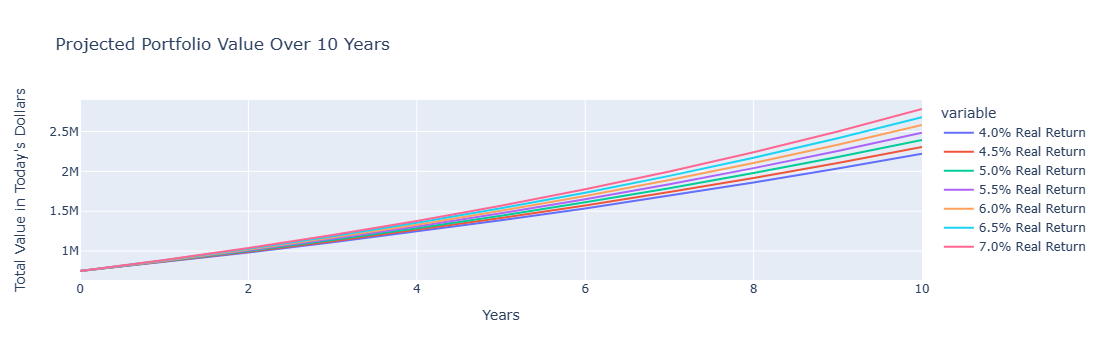

In [5]:
import numpy as np
import pandas as pd
import plotly.express as px

# Initialize variables
initial_balance = 750_000  # Starting with $750,000
monthly_contribution = 6_666  # Contributing $6,666 monthly
annual_contribution = monthly_contribution * 12  # Annualize the monthly contribution
years = 10  # Over 10 years
inflation = 0.025  # Assuming 2.5% inflation

# Real returns in percentages for plotting multiple scenarios
real_returns = [0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07]

# Function to calculate future value for each year
def calculate_yearly_values(initial_balance, annual_contribution, real_return, inflation, years):
    yearly_values = np.zeros(years + 1)
    yearly_values[0] = initial_balance  # Initial balance in year 0
    for year in range(1, years + 1):
        initial_balance *= (1 + real_return)  # Compounding the initial balance
        yearly_values[year] = initial_balance  # Storing the compounded initial balance for year i

        # Calculating the future value of contributions up to year i
        temp_annual_contribution = annual_contribution
        for j in range(year):
            yearly_values[year] += temp_annual_contribution * ((1 + real_return) ** (year - j))
            temp_annual_contribution *= (1 + inflation)  # Account for inflation in the contributions

    return yearly_values

# Create a DataFrame to hold the yearly values
df = pd.DataFrame({'Years': np.arange(0, years + 1)})

# Calculate and add yearly values for each real return scenario to the DataFrame
for real_return in real_returns:
    yearly_values = calculate_yearly_values(initial_balance, annual_contribution, real_return, inflation, years)
    df[f"{real_return * 100:.1f}% Real Return"] = yearly_values

# Create the interactive line chart
fig = px.line(df, x='Years', y=df.columns[1:],
              title='Projected Portfolio Value Over 10 Years',
              labels={'value': 'Total Value in Today\'s Dollars'},
              hover_data={"Years": True})

fig.show()


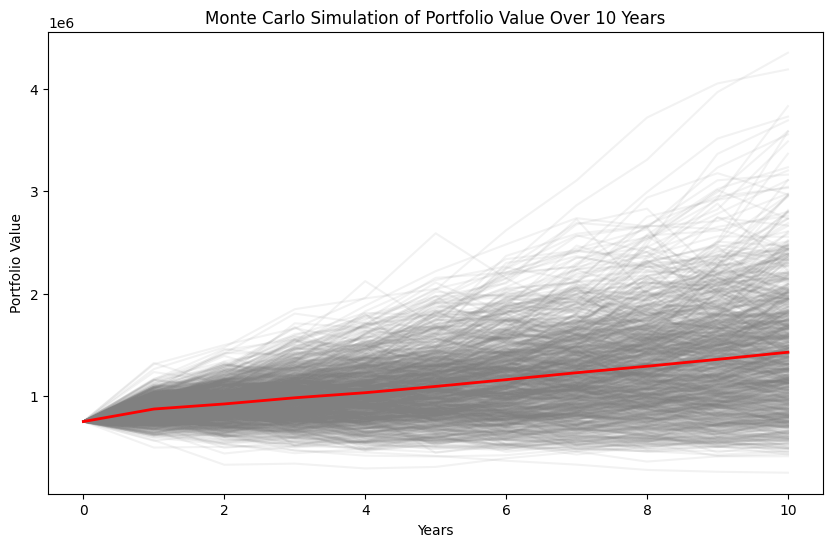

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
initial_balance = 750_000  # Starting with $750,000
monthly_contribution = 6_666  # Contributing $6,666 monthly
annual_contribution = monthly_contribution * 12  # Annualize the monthly contribution
years = 10  # Over 10 years
n_simulations = 1000  # Number of Monte Carlo simulations

# Average real return and standard deviation (historical for a broad market index like S&P 500)
# Assuming average real return of 6% and standard deviation of 15%
mu = 0.06
sigma = 0.15

# Function to run a single Monte Carlo simulation
def monte_carlo_simulation(initial_balance, annual_contribution, mu, sigma, years):
    yearly_values = np.zeros(years + 1)
    yearly_values[0] = initial_balance
    for year in range(1, years + 1):
        # Simulate a random real return based on a normal distribution
        simulated_return = np.random.normal(mu, sigma)
        
        # Compounding the initial balance with the simulated return
        initial_balance *= (1 + simulated_return)
        yearly_values[year] = initial_balance
        
        # Adding the annual contribution
        yearly_values[year] += annual_contribution
        
    return yearly_values

# Run Monte Carlo simulations and store the results
all_simulations = np.zeros((n_simulations, years + 1))

for i in range(n_simulations):
    all_simulations[i] = monte_carlo_simulation(initial_balance, annual_contribution, mu, sigma, years)

# Plot the Monte Carlo simulations
plt.figure(figsize=(10, 6))
for i in range(n_simulations):
    plt.plot(range(years + 1), all_simulations[i], color='gray', alpha=0.1)

# Plot the mean outcome
plt.plot(range(years + 1), np.mean(all_simulations, axis=0), color='red', linewidth=2)

plt.xlabel('Years')
plt.ylabel('Portfolio Value')
plt.title('Monte Carlo Simulation of Portfolio Value Over 10 Years')
plt.show()


In [7]:
# Calculate percentiles for the final year's portfolio values across all simulations
final_values = all_simulations[:, -1]  # Extract the final year's values from all simulations
percentiles = [5, 25, 50, 75, 95]  # Define the desired percentiles

# Calculate the percentile values
percentile_values = np.percentile(final_values, percentiles)

# Create a DataFrame to display the results
percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'Final Portfolio Value': percentile_values
})

percentile_df


,Percentile,Final Portfolio Value
0,5,6.370755e+05
1,25,9.845817e+05
2,50,1.352133e+06
3,75,1.750944e+06
4,95,2.451420e+06
